In [61]:
%load_ext autoreload
%autoreload 2
import sys

path = "C:/Users/schiavaz/lava-nc/depth/"
sys.path.append(path)

import numpy as np
import matplotlib.pyplot as plt

import events_utils.time_difference as td
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import open3d as o3d
from tqdm import tqdm

import events_utils.filter as flt
import events_utils.visualize as vis
import events_utils.time_difference as td
import events_utils.time_difference_2d as td2d
import events_utils.mvsec as mvsec_dset
import events_utils.flow as flow_utils

from scipy.spatial.transform import Rotation as R

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
shape = (30, 30)

In [63]:
events = np.loadtxt("events_synt.txt")

In [64]:
U, V, std_u, std_v = td2d.measure_td2(events, shape, dist=1, px_range_pred=7, std_thr=10.1, mean_thr=10.02, start_delay=0.02, final_delay=0.3)

100%|█████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 13426.24it/s]


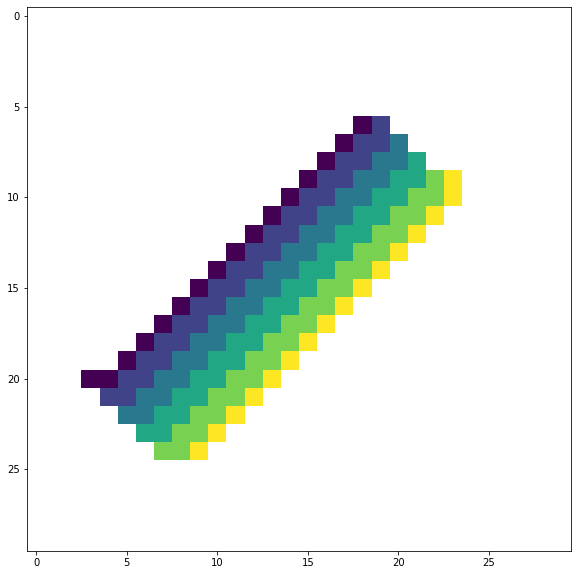

In [65]:
%matplotlib inline
plt.figure(figsize=(10, 10))
img = vis.events2time_surf(events, shape, filter_polarity=False, polarity=0)
img_m = np.ma.masked_where(img == 0, img)
m = plt.imshow(img_m, interpolation="none")

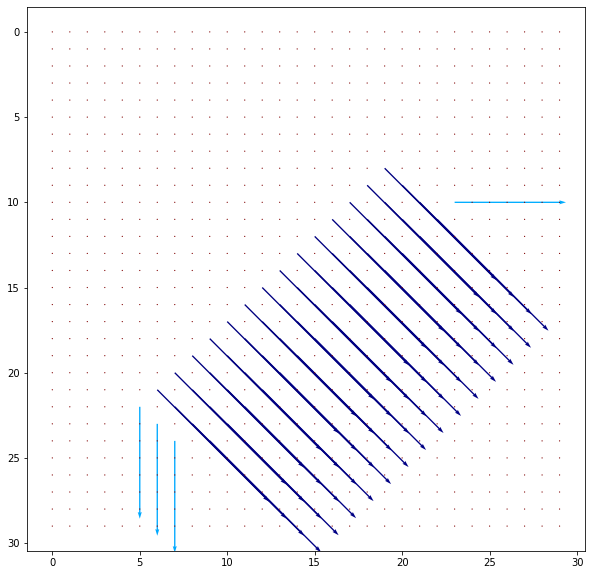

In [66]:
m = np.sqrt(U**2 + V**2)
%matplotlib inline
plt.figure(figsize=(10, 10))
a = 1
plt.quiver(U[::a, ::a], V[::a, ::a], m[::a, ::a], cmap="jet_r")
plt.gca().invert_yaxis()

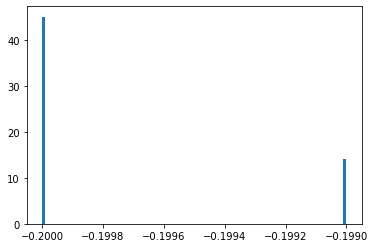

In [67]:
h = np.ma.masked_where(V == 0.0, V)
plt.hist(h.compressed(), 100);

In [75]:
f = np.array([np.cos(np.deg2rad(45)), -np.sin(np.deg2rad(45))])

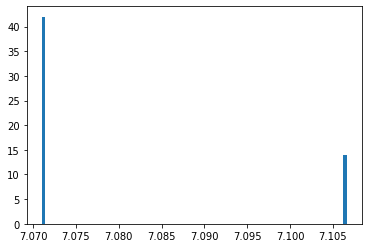

In [87]:
um = 1.0 / np.ma.masked_where(U == 0.0, U)
vm = 1.0 / np.ma.masked_where(V == 0.0, V)
m = np.sqrt(np.square(um) + np.square(vm))

x_inv = (um*f[0] + vm*f[1]) / np.square(m)

plt.hist(m.compressed(), 100);

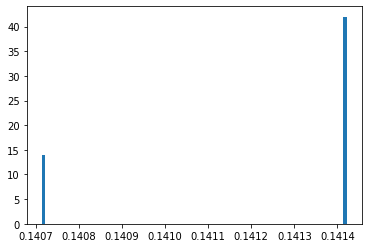

In [77]:
plt.hist(x_inv.compressed(), 100);

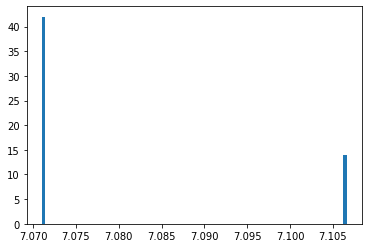

In [78]:
x = 1.0 / x_inv
plt.hist(x.compressed(), 100);

In [85]:
um = np.ma.masked_where(U == 0.0, U)
vm = np.ma.masked_where(V == 0.0, V)
m = np.sqrt(np.square(um) + np.square(vm))

x_inv = (um*f[0] + vm*f[1])

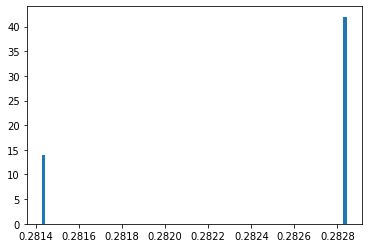

In [80]:
plt.hist(x_inv.compressed(), 100);

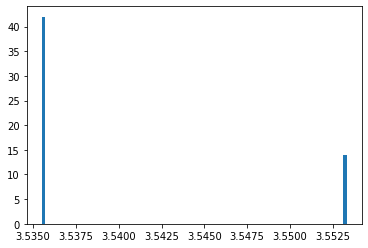

In [81]:
x = 1.0 / x_inv
plt.hist(x.compressed(), 100);

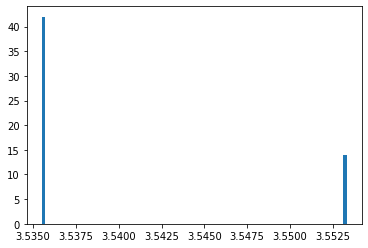

In [83]:
plt.hist(1.0 / m.compressed(), 100);